Untuk awal awal kita akan import semua library nya

In [44]:
# untuk awal awal kita akan menentukan library yang akan kita gunakan 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


setelah itu kita akan menload data yang ada

In [45]:
# melakukan load data
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [46]:
# menentukan variable x yang akan dipakai
data = data.loc[:, ["ApplicantIncome", "LoanAmount"]]
data.head(2)

,ApplicantIncome,LoanAmount
0,4583,128
1,3000,66


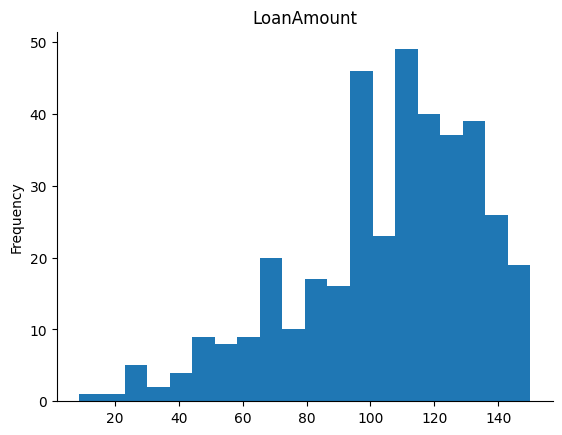

In [47]:
# lalu kita akan memvisualisasikan dari data kita
data["LoanAmount"].plot(kind='hist', bins=20, title='LoanAmount')
plt.gca().spines[['top', 'right',]].set_visible(False) # ini fungsinya untuk menonaktifkan border di atas dan kanan

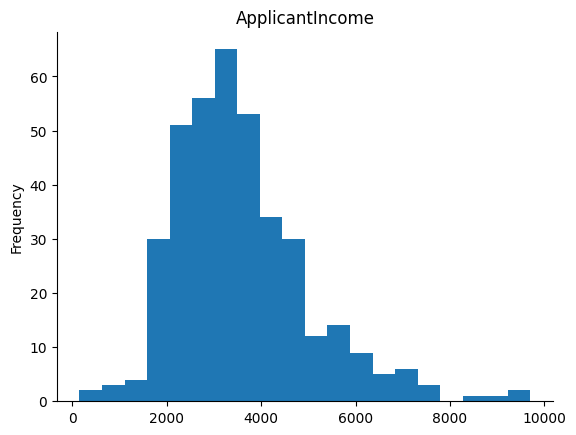

In [48]:
# visualisasikan dengan atribut lainnya
data['ApplicantIncome'].plot(kind='hist', bins=20, title="ApplicantIncome")
plt.gca().spines[['top', 'right',]].set_visible(False) # untuk ini untuk menghilangkan 

In [49]:
# fungsinya untuk mengubah data x menjadi array
X = data.values
X[:5]

array([[4583,  128],
       [3000,   66],
       [2583,  120],
       [6000,  141],
       [2333,   95]], dtype=int64)

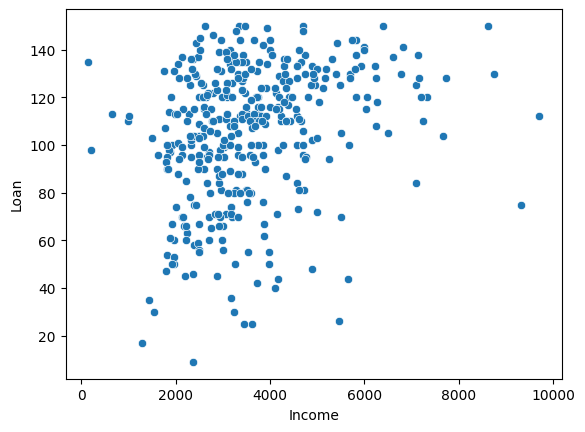

In [50]:
df = pd.DataFrame(X, columns=['Income', 'Loan']) # tentukan dataframe yang ingin divisualisasikan
sns.scatterplot(data=df, x='Income', y='Loan') # kita gunakan scatterplot untuk menampilkan datanya
plt.xlabel('Income') # label vertikal
plt.ylabel('Loan') # label horizontal
plt.show()

In [51]:
# untuk menghitung inertia atau jumlah error data
def calculate_cost(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
        # kita akan menghitung untuk setiap setiap error item dengan menghitung jarak centroid dengan member

    return sum

In [52]:
def kmeans(X, k, all_centroid=False):
    all_centroid_iter = []
    diff = 1 # untuk melakukan perhitungan perbedaan antara iterasi terakhir dengan baru
    cluster = np.zeros(X.shape[0]) # menyiapkan list cluster kosong yang dapat dimasukkan

    random_indices = np.random.choice(len(X), size=k, replace=False) # melakukan randomize untuk menentukan centroidnya
    centroids = X[random_indices, :] # memotong hasil randomnya dengan item yang ada

    # looping sampai tidak ada perbedaan iterasi -1 dengan iterasi -2
    while diff:
        # kita lakuakan peloopingan mencari cluster / menentukan cluster
        for i, row in enumerate(X): 
            mn_dist = float('inf')
            # looping untuk menghitung distancenya dg euclidean
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx

        # menentukan centroid yang baru
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values

        # jika hasil dari perbedaan iterasi -1 dengan iterasi -2 maka jadikan diff nya 0
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            if all_centroid:
                all_centroid_iter.append(new_centroids)
            centroids = new_centroids # perbarui centroidnya
        
    if all_centroid:
        return centroids, cluster, all_centroid_iter
    return centroids, cluster

In [79]:
class Kmeans():
    # initialisasikan
    def __init__(self, max_iter=100, n_cluster=2, decimal_rand=10, min_diff=0.00001):
        self.inertia = 0
        self.n_cluster = n_cluster
        self.min_diff = min_diff
        self.max_iter = max_iter
        self.centroids = None

    # menghitung jarak uclidean
    @staticmethod
    def euclidean_distance(point1, point2):
        return np.sqrt(np.sum((point2 - point1)**2, axis=1))
    
    # melakukan training data
    def fit(self, x):
        # menentukan centroid secara acak (di awal-awal)
        self.centroids = np.random.uniform(np.amin(x, axis=0), np.amax(x, axis=0), size=(self.n_cluster, x.shape[1]))

        # melakukan iterasi
        for iteration in range(self.max_iter):
            # menghilangkan label ke awal
            y = []
            distance_w_cluster = [] # digunakan untuk menghitung distance yang paling kecil (untuk inertia)

            # menentukan labelnya / termasuk cluster apa (dengan menentukan jarak euclidian nya)
            for item in x:
                distances = Kmeans.euclidean_distance(item, self.centroids) # menghitung jarak setiap centroid
                distance_w_cluster.append(distances.min()) # menentukan jarak terkecil
                cluster = np.argmin(distances) # menentukan termasuk cluster apa dengan mencari jarak terkecilnya
                y.append(cluster)

            y = np.array(y)

            # untuk memisahkan antar cluster
            groups = []

            for i in range(self.n_cluster):
                groups.append(np.argwhere(y == i)) # mencari yang mana label sama dengan i 
            # print(groups)
            
            # menentukan centroid yang baru
            new_centroid = []
            inertia_group = []
            distance_w_cluster = np.array(distance_w_cluster)
            for i, indices in enumerate(groups):
                if len(indices) == 0: # jika ada centroid yang tak punya member
                    new_centroid.append(self.centroids[i]) # gunakan centroid yang sebelumnya
                else:
                    inertia_group.append(np.sum(distance_w_cluster[indices]))
                    new_centroid.append(np.mean(x[indices], axis=0)[0]) # mencari rata-rata dari centroid sebelumnya
            # print(np.sum(distance_w_cluster))
            # counting the error (inetia)
            self.inertia = np.mean(np.array(inertia_group)**2)

            # if the centroid not move the position from previous iteration
            if np.max(self.centroids - np.array(new_centroid)) < self.min_diff:
                break
            else:
                self.centroids = np.array(new_centroid) # update centroid position
            


In [80]:
cost_list = []

# kita akan mencoba mengumpulkan semua error dengan parameter k yang berbeda beda
for k in range(1, 10):
    model = Kmeans(n_cluster=k) # proses training
    model.fit(X)
    cost_list.append(model.inertia)

# from sklearn.cluster import KMeans

# cost_list = []

# # kita akan mencoba mengumpulkan semua error dengan parameter k yang berbeda beda
# for k in range(1, 10):
#     kmean = KMeans(n_clusters=k).fit(X) # proses training

#     cost_list.append(kmean.inertia_)

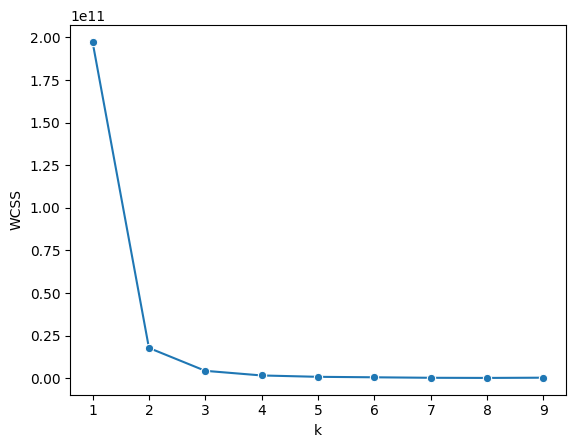

In [81]:
# kita siapkan plotting untuk menampilkan hasil graphics lalu analisa dengan teknik elbow analyst
sns.lineplot(x=range(1, 10), y=cost_list, marker='o') 
plt.xlabel('k')
plt.ylabel("WCSS")
plt.show()

In [82]:
k = 4 # kita tentukan untuk jumlah kluster yang cocok
centroids, cluster, all_centroid = kmeans(X, k, True) # kita training modelnya

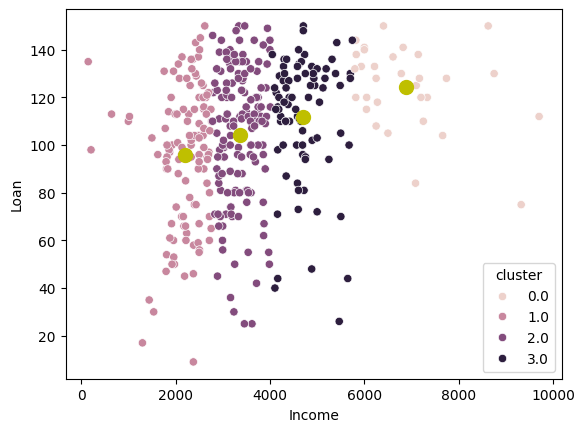

In [84]:
df = pd.DataFrame(X, columns=['Income', 'Loan']) # menyiapkan dataframe
df['cluster'] = cluster

# kita tampilkan untuk hasil scatter beserta dengan label dan centroidnya
sns.scatterplot(data=df, x='Income', y='Loan', hue='cluster')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, color='y')
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()